In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import scipy.stats as stats
import distribution as dist

In [3]:
life_exp_df = pd.read_csv("Life_Expectancy_Data.csv")
life_exp_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
mini_life_exp_df = life_exp_df[["Country", "Year", "Life expectancy ", "Adult Mortality", "infant deaths"]]
mini_life_exp_df = mini_life_exp_df[mini_life_exp_df['Life expectancy '].notna()]
mini_life_exp_df.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths
0,Afghanistan,2015,65.0,263.0,62
1,Afghanistan,2014,59.9,271.0,64
2,Afghanistan,2013,59.9,268.0,66
3,Afghanistan,2012,59.5,272.0,69
4,Afghanistan,2011,59.2,275.0,71


Life expectancy 
Mean: 69.22493169398908
Std: 9.523867487824301



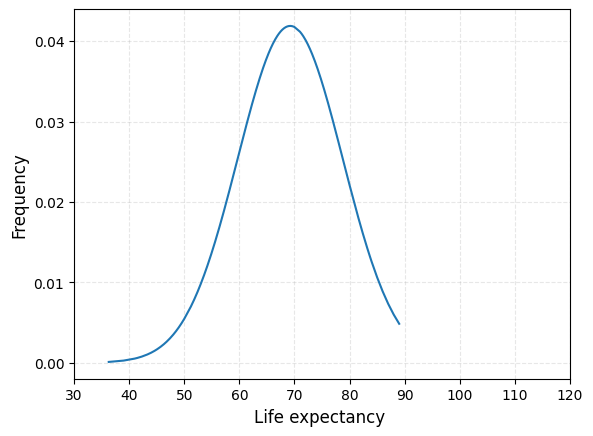

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Life Exp Scaled
0,Afghanistan,2015,65.0,263.0,62,0.544592
1,Afghanistan,2014,59.9,271.0,64,0.447818
2,Afghanistan,2013,59.9,268.0,66,0.447818
3,Afghanistan,2012,59.5,272.0,69,0.440228
4,Afghanistan,2011,59.2,275.0,71,0.434535


In [5]:
life_exp_col = "Life expectancy "
life_exp_mean, life_exp_std = dist.dist_info(mini_life_exp_df, life_exp_col)
dist.dist_plot(mini_life_exp_df, life_exp_col, life_exp_mean, life_exp_std, 30, 120)
mini_life_exp_df = dist.add_norm(mini_life_exp_df, life_exp_col, "Life Exp Scaled")
mini_life_exp_df.head()